In [13]:
import pandas as pd
import sklearn; print(sklearn.__version__)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

1.4.1.post1


In [14]:
#Import CSV file
data = pd.read_csv("student.csv")
data.head(5)

,Kindly Rate your Sleep Quality 😴,How many times a week do you suffer headaches 🤕?,How would you rate you academic performance 👩‍🎓?,how would you rate your study load?,How many times a week you practice extracurricular activities 🎾?,How would you rate your stress levels?
0,3,1,3,4,2,3
1,4,1,2,3,3,2
2,2,1,2,1,4,4
3,3,2,3,2,3,3
4,2,3,1,5,5,3


In [15]:
data.shape

(520, 6)

In [16]:
data.columns

Index(['Kindly Rate your Sleep Quality 😴',
       'How many times a week do you suffer headaches 🤕?',
       'How would you rate you academic performance 👩‍🎓?',
       'how would you rate your study load?',
       'How many times a week you practice extracurricular activities 🎾?',
       'How would you rate your stress levels?'],
      dtype='object')

In [17]:
data.isnull().sum()

Kindly Rate your Sleep Quality 😴                                    0
How many times a week do you suffer headaches 🤕?                    0
How would you rate you academic performance 👩‍🎓?                    0
how would you rate your study load?                                 0
How many times a week you practice extracurricular activities 🎾?    0
How would you rate your stress levels?                              0
dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 6 columns):
 #   Column                                                            Non-Null Count  Dtype
---  ------                                                            --------------  -----
 0   Kindly Rate your Sleep Quality 😴                                  520 non-null    int64
 1   How many times a week do you suffer headaches 🤕?                  520 non-null    int64
 2   How would you rate you academic performance 👩‍🎓?                  520 non-null    int64
 3   how would you rate your study load?                               520 non-null    int64
 4   How many times a week you practice extracurricular activities 🎾?  520 non-null    int64
 5   How would you rate your stress levels?                            520 non-null    int64
dtypes: int64(6)
memory usage: 24.5 KB


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

y = data["How would you rate your stress levels?"]
x = data.drop("How would you rate your stress levels?",axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [21]:
# Predict on the test data
y_pred = clf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9326923076923077


In [22]:
input_data = [2,1,2,1,4]
input_data = [input_data]
predicted_stress_level = clf.predict(input_data)

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [23]:
print("Predicted stress level:", predicted_stress_level[0])

Predicted stress level: 4


In [24]:
# from joblib import dump, load
# dump(clf, 'student.joblib')

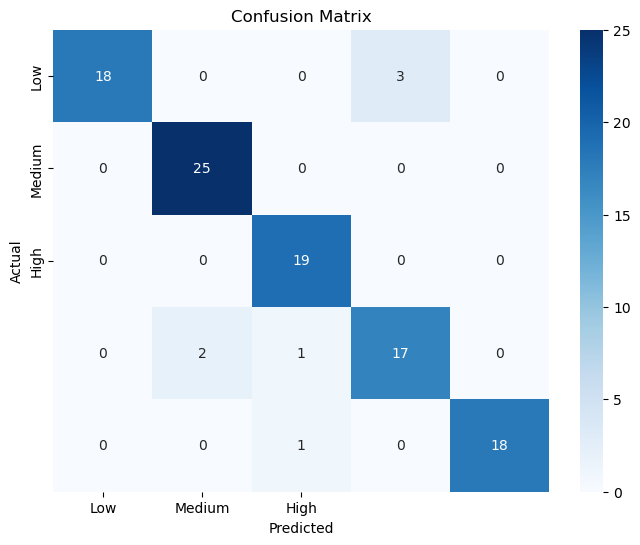

In [27]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

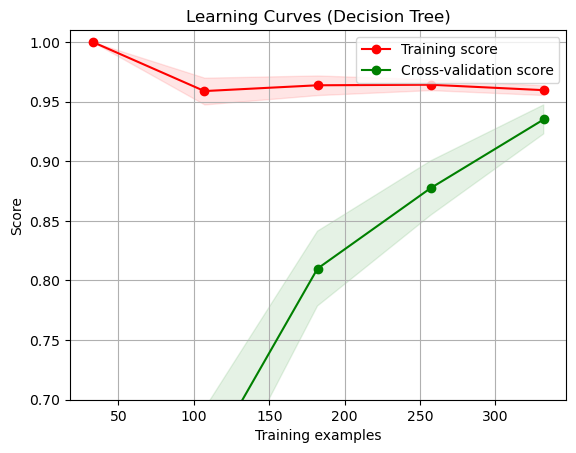

In [29]:
from sklearn.model_selection import learning_curve
import numpy as np

# Define a function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve
title = "Learning Curves (Decision Tree)"
plot_learning_curve(clf, title, x_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=-1)

plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127934 (\N{TENNIS RACQUET AND BALL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128105 (\N{WOMAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129301 (\N{FACE WITH HEAD-BANDAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


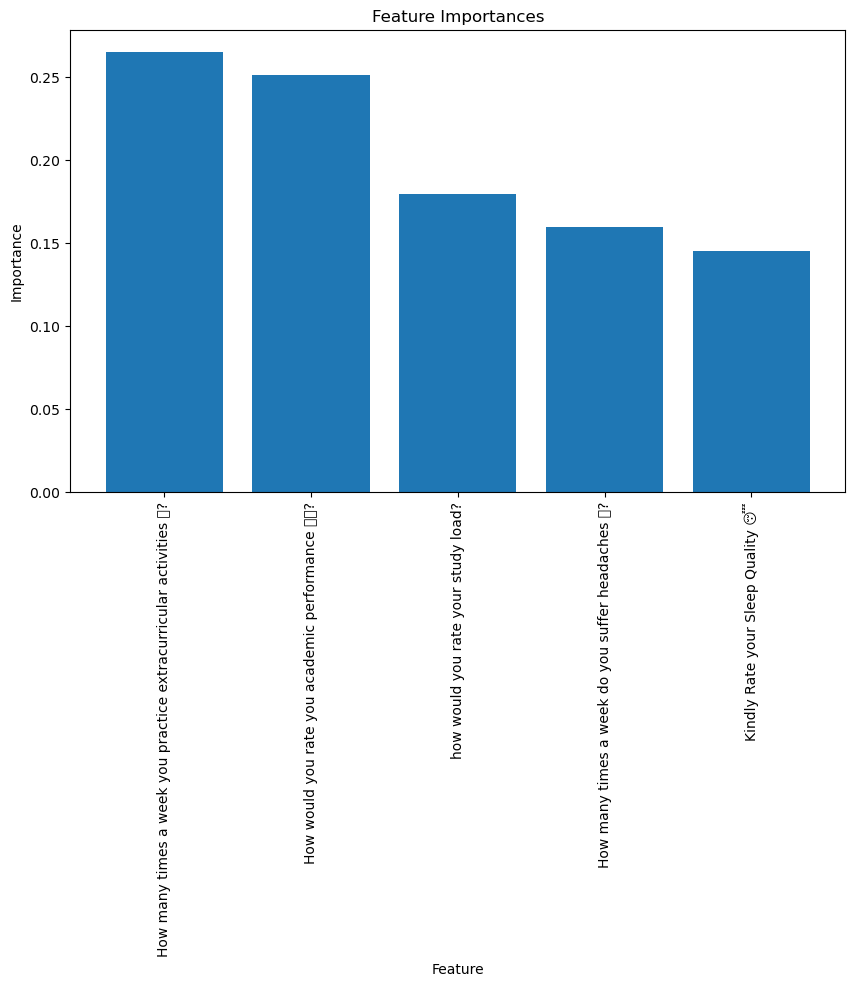

In [30]:
# Get feature importances
importances = clf.feature_importances_
features = x.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(x.shape[1]), importances[indices], align="center")
plt.xticks(range(x.shape[1]), features[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()